<a href="https://colab.research.google.com/github/gopi447/task-2/blob/main/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving flights_dataset (1).csv to flights_dataset (1) (1).csv
Shape: (1000, 8)


,Flight_ID,Airline,Origin,Destination,Scheduled_Departure,Actual_Departure,Distance,Delayed
0,F0001,AirIndia,BLR,HYD,2023-05-29 04:10:00,2023-05-29 04:20:00,428,0
1,F0002,Vistara,BOM,BLR,2023-05-05 18:15:00,2023-05-05 18:25:00,631,0
2,F0003,AirIndia,HYD,BLR,2023-05-21 06:37:00,2023-05-21 06:42:00,1521,0
3,F0004,SpiceJet,CCU,HYD,2023-05-04 08:02:00,2023-05-04 08:07:00,677,0
4,F0005,Vistara,DEL,BLR,2023-05-01 22:57:00,2023-05-01 23:27:00,1582,1


Flight_ID              0
Airline                0
Origin                 0
Destination            0
Scheduled_Departure    0
Actual_Departure       0
Distance               0
Delayed                0
dtype: int64


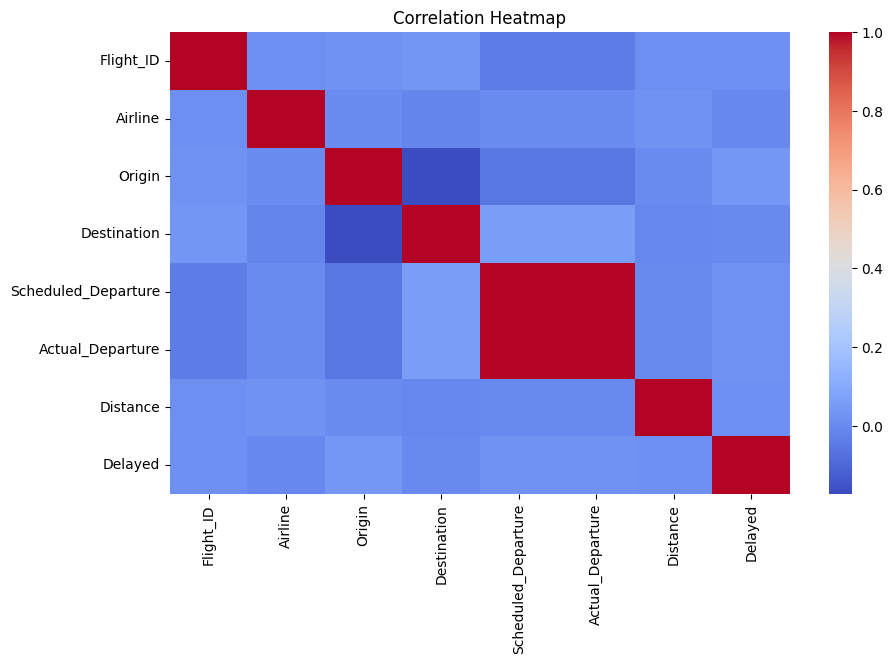

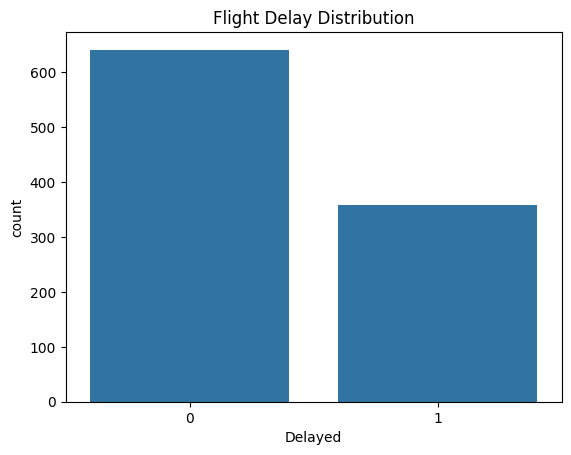

Accuracy: 0.59

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.87      0.73       128
           1       0.29      0.10      0.15        72

    accuracy                           0.59       200
   macro avg       0.46      0.48      0.44       200
weighted avg       0.51      0.59      0.52       200



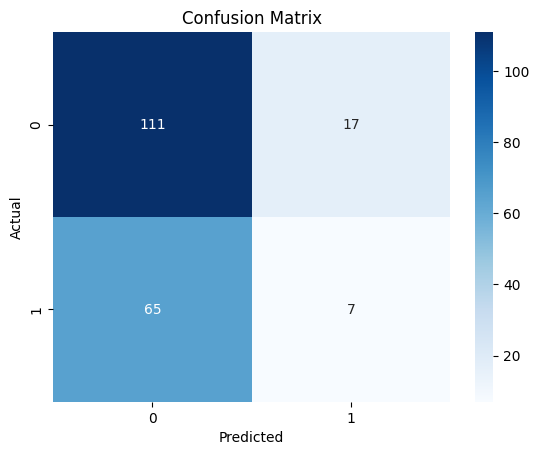

In [4]:
# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


# 2. Load Dataset

# Upload file manually in Colab (use the file picker)
from google.colab import files
uploaded = files.upload()

# Read CSV
df = pd.read_csv(next(iter(uploaded.keys())))
print("Shape:", df.shape)
display(df.head())


# 3. Data Cleaning & Preprocessing

# Check nulls
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Fill missing numeric values with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# 4. Exploratory Data Analysis (EDA)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Example: Flight delays distribution
if 'Delayed' in df.columns:  # adjust if column name differs
    sns.countplot(x='Delayed', data=df)
    plt.title("Flight Delay Distribution")
    plt.show()

# Example: Plotly interactive chart
if 'Airline' in df.columns and 'Delayed' in df.columns:
    fig = px.histogram(df, x='Airline', color='Delayed', barmode='group',
                       title="Delays by Airline")
    fig.show()


# 5. Machine Learning (Classification)

# Assuming 'Delayed' is the target (0/1). Change if needed.
target = 'Delayed'
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 6. Dashboard-like Visualization

# Delay percentage by Airline
if 'Airline' in df.columns and 'Delayed' in df.columns:
    delay_airline = df.groupby('Airline')[target].mean().reset_index()
    fig = px.bar(delay_airline, x='Airline', y=target,
                 title="Average Delay Percentage by Airline")
    fig.show()

# Delay trends by Month (if column exists)
if 'MONTH' in df.columns and 'Delayed' in df.columns:
    delay_month = df.groupby('MONTH')[target].mean().reset_index()
    fig = px.line(delay_month, x='MONTH', y=target, markers=True,
                  title="Delay Trends by Month")
    fig.show()